In [39]:
import json
import math
import os
  


path_to_json = './data/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('r_1.797.json')]
print(json_files) 
data = []
for file in json_files:
    # Opening JSON file
    f = open(path_to_json + file)
    data += json.load(f)

['egg_callibration_5_r_1.797.json', 'egg_callibration_6_r_1.797.json', 'egg_callibration_7_r_1.797.json', 'egg_callibration_8_r_1.797.json']


length:987.1544965201749
distance:866.4577312252457
length:882.7236260574427
distance:776.9646066585016
length:789.7474279793508
distance:693.715359495521
length:699.3375436797312
distance:617.8284551556362
length:618.1423784210236
distance:555.3062218272005
length:547.1791297189615
distance:509.76268988618614
length:488.62255371605596
distance:484.69062297510976
length:452.45220742085013
distance:485.84462536905767
length:442.2544516452039
distance:510.4919196226322
length:459.2003919858954
distance:557.2153982079103
length:497.533918441748
distance:619.588573167711
length:554.2607689526654
distance:693.9344349432445
length:632.4207460227724
distance:779.092420705015
length:719.6360191096608
distance:870.6417173556525
length:810.4745523457229
distance:965.87059174612
length:903.7698822156003
distance:1062.5803499030085
length:998.4948672877592
distance:1161.251480085171
length:937.2945108129035
distance:810.8816189802307
length:835.0239517522836
distance:714.1498442203849
length:730.7

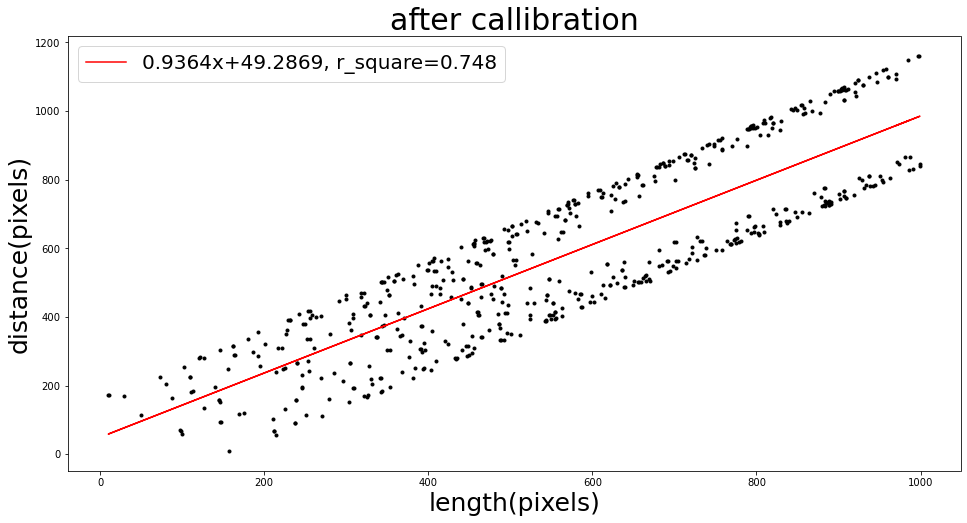

In [41]:
import json
import math
import pandas as pd
from matplotlib import pyplot as plt
plt.figure(figsize=(16,8))
x = [[],[],[],[]]
y = [[],[],[],[]]
x_all = []
y_all = []
colors = []
for count, i in enumerate(data):
#     print(count, i)
    try:
        distance_x  = i['before'][0][0]-803
        distance_y = i['before'][0][1]-578
        distance = math.sqrt(distance_x**2+distance_y**2)
        length = math.sqrt((i['before'][0][0]-i['after'][0][0])**2+(i['before'][0][1]-i['after'][0][1])**2)
        print(f"length:{length}")
        print(f"distance:{distance}")
        if (length < 1000) and (distance <1250):
#             if diff_x > 0:
#                 if diff_y < 0:  # 第一象限
#                     colors.append('red')
#                     x[0].append(length)
#                     y[0].append(error)
#                 else:  # 第四象限
#                     colors.append('blue')
#                     x[3].append(length)
#                     y[3].append(error)
#             else:
#                 if diff_y > 0:  # 第三象限
#                     colors.append('yellow')
#                     x[2].append(length)
#                     y[2].append(error)
#                 else:  # 第二象限
#                     colors.append('green')
#                     x[1].append(length)
#                     y[1].append(error)
            x_all.append(length)
            y_all.append(distance)

          
        else:
            print(f"large error: {error}, {i}")
    except:
        print(f"error: {i}")

from scipy import stats
def myfunc(x):
    return slope * x + intercept
list_color = ['red', 'blue', 'yellow', 'green']
# for j in range(2):
#     print(f"x: {x[j]}, y:{y[j]}")
slope, intercept, r, p, std_err = stats.linregress(x_all, y_all)
mymodel = list(map(myfunc, x_all))
#     plt.plot(x[j], mymodel, label=f'{slope:.4f}x+{intercept:.4f}',c=list_color[j])
plt.plot(x_all, mymodel, label=f'{slope:.4f}x+{intercept:.4f}, r_square={r**2:.3f}', c="r")

plt.scatter(x_all, y_all, c="k", marker='.')
# plt.plot(x, mymodel, c='r')
plt.xlabel('length(pixels)', size=25)
plt.ylabel('distance(pixels)', size=25)
plt.title('after callibration', size=30)
plt.legend(loc=2, prop={'size': 20})
plt.show()

In [11]:
print(x_all)

[]


In [64]:
import matplotlib.pyplot as plt
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

TypeError: 'list' object is not callable

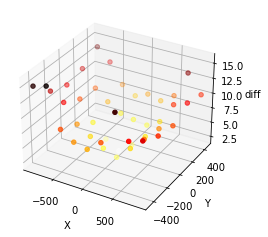

In [43]:
# 3d fig
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import json
import math
  
# Opening JSON file
f = open("../findcenter_callibration.json")
data = json.load(f)
x = []
y = []
diff = []
for i in data:
    diff_x = i['before'][0][0]-960
    diff_y = i['before'][0][1]-540
    diff_after = math.sqrt((i['after'][0][0]-960)**2+(i['after'][0][1]-540)**2)
    x.append(diff_x)
    y.append(diff_y)
    diff.append(diff_after)

ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
#  将数据点分成三部分画，在颜色上有区分度
ax.scatter(x, y, diff, c=diff, cmap="hot_r")  # 绘制数据点
# ax.scatter(x[10:20], y[10:20], z[10:20], c='r')
# ax.scatter(x[30:40], y[30:40], z[30:40], c='g')

ax.set_zlabel('diff')  # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()


In [37]:
len(x)

45